# NorthWest Genomics Center of Excellence

# Set Up

This project uses an R environment (`renv`) to save all the packages/versions used in the scripts.

To install the packages;

1.  Please upgrade to `renv` version 1.0.5 or higher
2.  At the root of the project/your local clone, run `renv::restore()`
3.  This should install all the packages required

In [ ]:
# ----- Load Libraries ----- #
## ---- libraries
library(pacman)


# Read in DOH Data

These data are public and can be found on the WA DOH resp illness dashboard [under sequencing/variants](https://doh.wa.gov/data-and-statistical-reports/diseases-and-chronic-conditions/communicable-disease-surveillance-data/respiratory-illness-data-dashboard#downloads)

In [ ]:
# ----- Pull DOH Public Dashboard Data ----- #

## ---- pull-data
(
  variants <- read_xlsx(file.path("data/Downloadable_variant.xlsx")) %>%
    rename(c("start_date" = `Start Date`,
             "end_date" = `End Date`,
             "variant" = `Variant`,
             "seven_day_count" = `7-Day Sequence Count`,
             "seven_day_percent" = `7-Day Percent`,
             "datetime" = `Date/Time Updated`)) %>%
    # make the date ranges for the plot
    # group each date range
    group_by(start_date,end_date) %>%
    # assign each date range an id wtih dplyr::cur_group_id()
    mutate(group_id = cur_group_id()) %>%
    # create labels for the groups
    mutate(group_label = paste(start_date, " - \n", end_date)) %>%
    # add % to the percent labels
    mutate(percent_label = paste0(seven_day_percent,"%")) %>%
    ungroup()
)


# A tibble: 78 × 9
   start_date          end_date            variant    seven_day_count
   <dttm>              <dttm>              <chr>                <dbl>
 1 2023-04-30 00:00:00 2023-05-13 00:00:00 BA.2.75                  2
 2 2023-04-30 00:00:00 2023-05-13 00:00:00 BA.5                     1
 3 2023-04-30 00:00:00 2023-05-13 00:00:00 BN.1                     1
 4 2023-04-30 00:00:00 2023-05-13 00:00:00 CH.1.1                   4
 5 2023-04-30 00:00:00 2023-05-13 00:00:00 EG.5                     2
 6 2023-04-30 00:00:00 2023-05-13 00:00:00 XBB                      8
 7 2023-04-30 00:00:00 2023-05-13 00:00:00 XBB.1.16                27
 8 2023-04-30 00:00:00 2023-05-13 00:00:00 XBB.1.16.1               7
 9 2023-04-30 00:00:00 2023-05-13 00:00:00 XBB.1.5                 90
10 2023-04-30 00:00:00 2023-05-13 00:00:00 XBB.1.5.1                2
# ℹ 68 more rows
# ℹ 5 more variables: seven_day_percent <dbl>, datetime <dttm>, group_id <int>,
#   group_label <chr>, percent_label <chr>

# Variant Plot

This should produce a similar variant plot to what’s in the dashboard

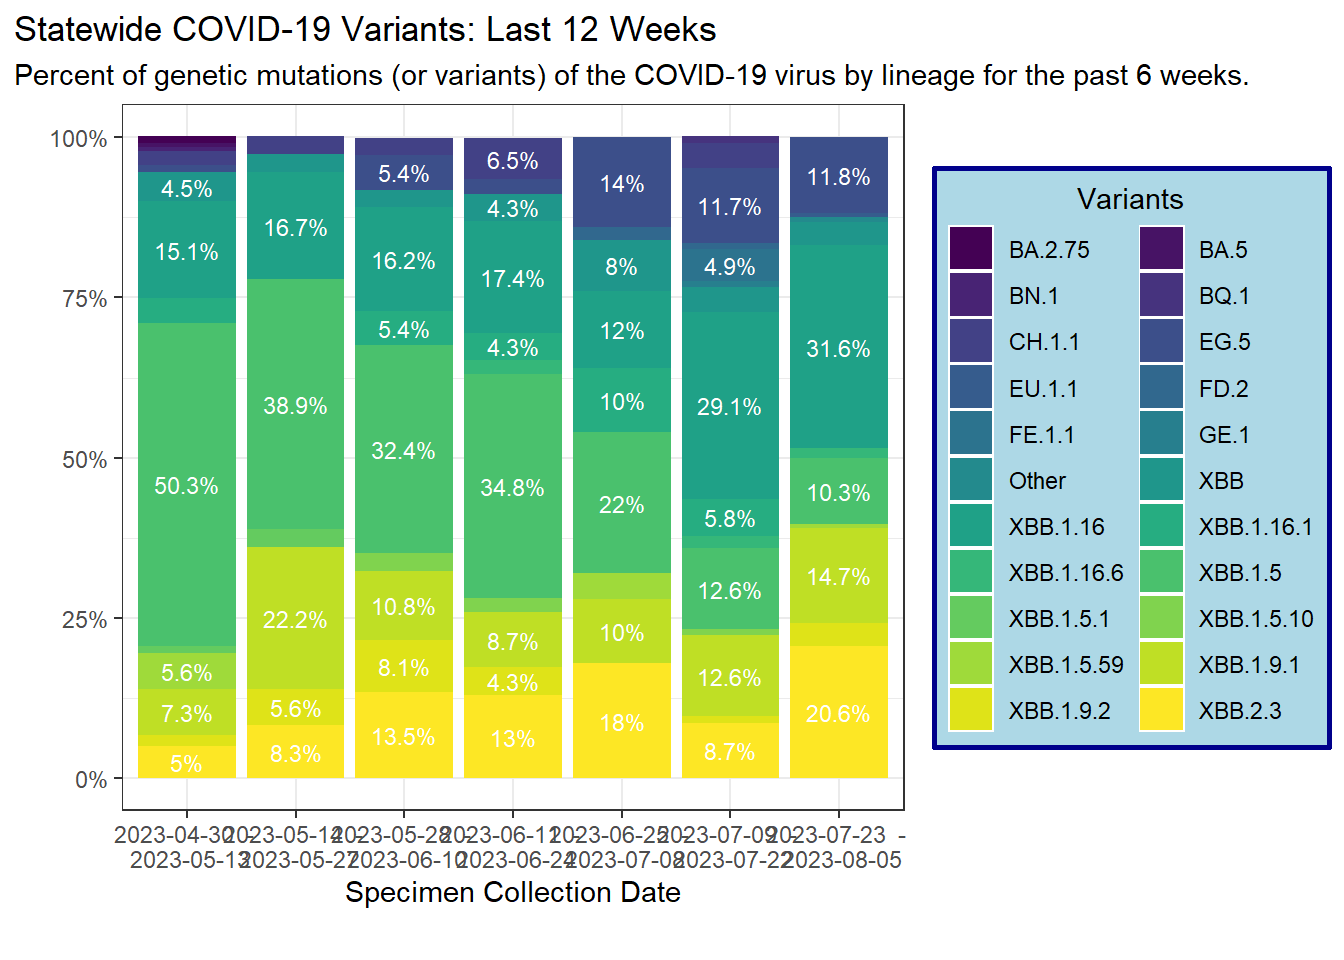

In [ ]:

# title = "<b><span style = 'font-size:14pt;'>Statewide COVID-19 Variants: Last 12 Weeks</span></b><br>This chart shows the percent of genetic mutations (or variants) of the COVID-19 virus by lineage for the past 6 weeks. Knowing how the virus is changing and which variants are found helps inform our public health response, which includes developing and recommending effective vaccines and treatments")

# ----- Make Variant Plot ----- #

## ---- var-plot
(
  variants %>%
    ggplot(aes(y=seven_day_percent,
               x=group_label,
               fill=variant,
               label=percent_label)) +
    geom_bar(position="stack", stat="identity") +
    geom_text(
      aes(
        label=ifelse(
          seven_day_percent>4.0,
          percent_label,
          ""
          )
        ),
      size = 3,
      position = position_stack(vjust = 0.5),
      color="white") +
    scale_fill_viridis_d(na.value = "red") +
    # Add percent sign 
    scale_y_continuous(labels = function(x) paste0(x, "%")) +
    labs(
         # Without the caption, the dates get cut off in the email..
         caption = "",
         x = "Specimen Collection Date",
         y = "",
         title = "Statewide COVID-19 Variants: Last 12 Weeks",
         subtitle = "Percent of genetic mutations (or variants) of the COVID-19 virus by lineage for the past 6 weeks."
         ) +
    theme_bw() +
    theme(
      # take out the default background
      strip.background  = element_blank(),
      # Adjust where the legend is an put a sick background behind it
      legend.position = 'right',
      legend.background = element_rect(fill = "lightblue",
                                       linetype = "solid",
                                       color = "darkblue",
                                       linewidth = 1),
      legend.direction = "vertical", legend.box = "horizontal",
      plot.title.position = "plot") +
      # plot.title = element_textbox_simple(
      #   maxwidth = unit(6,"in"),
      #   hjust = .0005,
      #   size = 10,
      #   padding = margin(5.5, 5.5, 5.5, 5.5),
      #   margin = margin(0, 0, 5.5, 0)
      #   # fill = "cornsilk"
      # )) +
    # Again adjust where the legend should be and how it should be labeled
    guides(fill = guide_legend(title = "Variants", 
                               title.position = "top",
                               title.hjust = .5,
                               byrow = TRUE,
                               override.aes = list(size=5.5)),
           size = guide_legend( )) 
)

## ---- stop
